In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.ensemble.partial_dependence import partial_dependence
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, auc
from itertools import izip
from sklearn.cross_validation import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from src import plot_roc


In [190]:
league_pit = pd.read_csv('/home/jun/Galvanize/capstone/Galvanize_capstone/Data/League_stats/league_stats_all_pit.csv')

In [112]:
MLB_pitchers = pd.read_csv('/home/jun/Galvanize/capstone/Galvanize_capstone/Data/Team_stats/pitching.csv')

In [174]:

pitchers = pd.read_csv('/home/jun/Galvanize/capstone/Galvanize_capstone/Data/Players/pitchers.csv')

In [175]:
pitchers = pitchers.drop('Unnamed: 0', axis=1)

In [176]:
pitchers.columns

Index([u'A', u'Aff_pitching', u'AgeDif_pitching', u'Age_pitching', u'BB9',
       u'BB_pitching', u'BF', u'BK', u'Bats_Right', u'Bats_both', u'Bats_left',
       u'Bats_unknown', u'CG', u'CS_fielding', u'CS_perc', u'Catcher',
       u'Centerfielder', u'Ch', u'DP', u'Designated', u'Drafted', u'E', u'ER',
       u'ERA', u'Fielding_position', u'First', u'Fld_perc', u'G', u'GF', u'GS',
       u'G_pitching', u'H9', u'HBP_pitching', u'HR9', u'HR_pitching',
       u'H_pitching', u'Height', u'Hitter', u'IBB_pitching', u'IP', u'L',
       u'Leftfielder', u'Lev', u'Lg_pitching', u'N/A', u'Name', u'Outfielder',
       u'Pitcher', u'RAvg', u'RF/G', u'R_pitching', u'Rightfielder',
       u'Rookie?', u'SB_fielding', u'SHO', u'SO/W', u'SO9', u'SO_pitching',
       u'SV', u'Second', u'Shortstop', u'Third', u'Throws_left',
       u'Throws_right', u'Throws_unknown', u'Tm', u'W', u'WHIP', u'WP',
       u'Weight', u'Year', u'player_id'],
      dtype='object')

In [116]:
pitchers.dtypes[pitchers.dtypes == object]

Aff_pitching         object
Fielding_position    object
Height               object
Lev                  object
Lg_pitching          object
Name                 object
dtype: object

In [177]:
pitchers.Height.unique()

array(['5\' 11"', '6\' 2"', '5\' 10"', '6\' 0"', '6\' 1"', '6\' 4"',
       '6\' 3"', '6\' 6"', '6\' 5"', '6\' 8"', '5\' 9"', '6\' 7"',
       '5\' 8"', '6\' 9"', '5\' 7"', '6\' 10"', '5\' 6"', '5\' 3"',
       '7\' 1"', '6\' 11"'], dtype=object)

In [178]:
def convert_to_meters(height):
    try:
        h = re.findall(r'\d', height)
        return (int(h[0]) * 12 * 2.54) + (int(h[1]) * 2.54)
    except TypeError:
        pass

In [179]:
pitchers.Height = pitchers.Height.apply(lambda x: convert_to_meters(x))

In [180]:
pitchers.Height = pitchers.Height.fillna(pitchers.Height.mean())  # filling the rest with its mean

In [181]:
def convert_to_list(x):
    try:
        return x.replace("'", '').replace("[", '').replace("]", '').split(', ')
    except AttributeError:
        pass  

In [182]:
#pitchers.Fielding_position =\
   # pitchers.Fielding_position.apply(lambda x: convert_to_list(x))

In [123]:
#pitchers.Fielding_position = pitchers.Fielding_position.fillna('Unknown')

In [124]:
#pitchers.Fielding_position = pitchers.Fielding_position.apply(lambda x: x.split() if x == 'Unknown' else x)

In [183]:
def list_to_dict(category_list):
    n_categories = len(category_list)
    return dict(zip(category_list, [1]*n_categories))

In [126]:
#df_dummies.columns = map(lambda x: 'Fielding_pos_' + x, df_dummies.columns)

In [127]:
#pitchers = pitchers.join(df_dummies)

In [184]:
pitchers = pitchers.drop('Fielding_position', axis=1)

In [185]:
pitchers.columns

Index([u'A', u'Aff_pitching', u'AgeDif_pitching', u'Age_pitching', u'BB9',
       u'BB_pitching', u'BF', u'BK', u'Bats_Right', u'Bats_both', u'Bats_left',
       u'Bats_unknown', u'CG', u'CS_fielding', u'CS_perc', u'Catcher',
       u'Centerfielder', u'Ch', u'DP', u'Designated', u'Drafted', u'E', u'ER',
       u'ERA', u'First', u'Fld_perc', u'G', u'GF', u'GS', u'G_pitching', u'H9',
       u'HBP_pitching', u'HR9', u'HR_pitching', u'H_pitching', u'Height',
       u'Hitter', u'IBB_pitching', u'IP', u'L', u'Leftfielder', u'Lev',
       u'Lg_pitching', u'N/A', u'Name', u'Outfielder', u'Pitcher', u'RAvg',
       u'RF/G', u'R_pitching', u'Rightfielder', u'Rookie?', u'SB_fielding',
       u'SHO', u'SO/W', u'SO9', u'SO_pitching', u'SV', u'Second', u'Shortstop',
       u'Third', u'Throws_left', u'Throws_right', u'Throws_unknown', u'Tm',
       u'W', u'WHIP', u'WP', u'Weight', u'Year', u'player_id'],
      dtype='object')

In [186]:
pitchers = pitchers.drop('N/A', axis=1)

In [187]:
pitchers = pitchers.drop(['Bats_unknown', 'Pitcher', 'Hitter',
                        'Throws_unknown', 'E', 'SB_fielding', 'A', 'Bats_Right', 
                        'Bats_both', 'Bats_left', 'Catcher', 'Centerfielder', 'Ch', 'DP', 'Designated', 'First',
                        'G', 'Leftfielder', 'Outfielder', 'RF/G', 'Second', u'Shortstop', u'Third',
                       ], axis=1 )

In [188]:
pitchers = pitchers.drop(['BB_pitching', 'CS_fielding', 'HR_pitching', 'H_pitching', 'IBB_pitching',
                          'R_pitching', 'Rightfielder'], axis=1)

In [189]:
pitchers = pitchers.drop(['SHO', 'BK', 'CG', 'ER', 'SO_pitching'],  axis=1)

In [134]:
#pitchers = pitchers.drop('Lg_pitching', axis=1)

In [191]:
pitchers.HBP_pitching = pitchers.HBP_pitching / pitchers.IP

In [136]:
#pitchers.SHO = pitchers.SHO/ pitchers.G_pitching

In [192]:
pitchers = pitchers[pitchers['Age_pitching'].notnull()]

In [193]:
pitchers[['CS_perc', 'Fld_perc', 'HBP_pitching']] =\
    pitchers[['CS_perc', 'Fld_perc', 'HBP_pitching']].fillna(pitchers[['CS_perc', 'Fld_perc', 
                                                                                'HBP_pitching']].mean())

In [194]:
pitchers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128515 entries, 0 to 130152
Data columns (total 35 columns):
Aff_pitching       102068 non-null object
AgeDif_pitching    128515 non-null float64
Age_pitching       128515 non-null float64
BB9                128515 non-null float64
BF                 128515 non-null float64
CS_perc            128515 non-null float64
Drafted            128515 non-null float64
ERA                128515 non-null float64
Fld_perc           128515 non-null float64
GF                 128515 non-null float64
GS                 128515 non-null float64
G_pitching         128515 non-null float64
H9                 128515 non-null float64
HBP_pitching       128515 non-null float64
HR9                128515 non-null float64
Height             128515 non-null float64
IP                 128515 non-null float64
L                  128515 non-null float64
Lev                128515 non-null object
Lg_pitching        128515 non-null object
Name               128515 non-nu

In [200]:
pitchers.insert(pitchers.shape[1], 'Role', 'N/A')

ValueError: cannot insert Role, already exists

In [201]:
pitchers.loc[(pitchers['GS'] / pitchers['G_pitching']) >= 0.5, 'Role'] = 'sp'

In [202]:
pitchers.loc[(pitchers.Role == 'N/A') & (pitchers.SV >= 5), 'Role'] = 'closer'

In [203]:
pitchers.loc[(pitchers.Role == 'N/A'), 'Role'] = 'rp'

In [204]:
pitchers[(pitchers['GS'] / pitchers['G_pitching']) >= 0.5].Role

1         sp
2         sp
3         sp
4         sp
5         sp
7         sp
8         sp
9         sp
10        sp
11        sp
12        sp
13        sp
14        sp
27        sp
28        sp
30        sp
50        sp
51        sp
55        sp
56        sp
57        sp
58        sp
59        sp
63        sp
64        sp
65        sp
66        sp
67        sp
68        sp
69        sp
          ..
130088    sp
130089    sp
130090    sp
130091    sp
130092    sp
130093    sp
130094    sp
130096    sp
130097    sp
130099    sp
130100    sp
130101    sp
130107    sp
130108    sp
130109    sp
130110    sp
130114    sp
130115    sp
130116    sp
130117    sp
130120    sp
130131    sp
130132    sp
130133    sp
130136    sp
130137    sp
130148    sp
130149    sp
130151    sp
130152    sp
Name: Role, dtype: object

In [97]:
some = pitchers.merge(MLB_pitchers, how='left', left_on=['Year', 'Aff_pitching', 'Role'], right_on = ['yearID', 'teamID', 'POS'], suffixes=['_Minor', '_MLB'])

In [205]:
some=pitchers

In [206]:
some = some[some.Year > 1995]

In [207]:
some.shape

(121239, 36)

In [208]:
some = some.drop('HBP_pitching', axis=1)

In [209]:
some = some.drop('Throws_right', axis=1)

In [210]:
some = some.rename(columns={'Throws_left': 'Throws'})

In [212]:
some = some[some.ERA_Minor < 20]

In [213]:
some = some[some.RAvg < 20]

## Histogram, feature vs label

In [655]:
some.columns

Index([u'Aff_pitching', u'AgeDif_pitching', u'Age_pitching', u'BB9', u'BF',
       u'CS_perc', u'Drafted', u'ERA_Minor', u'Fld_perc', u'GF', u'GS_Minor',
       u'G_pitching', u'H9', u'HR9', u'Height', u'IP', u'L_Minor', u'Lev',
       u'Lg_pitching', u'Name', u'RAvg', u'Rookie?', u'SO/W', u'SO9',
       u'SV_Minor', u'Throws_left', u'Throws_right', u'W_Minor', u'WHIP',
       u'WP', u'Weight', u'Year', u'player_id', u'Role', u'yearID', u'teamID',
       u'yearID.1', u'POS', u'W_MLB', u'L_MLB', u'G', u'GS_MLB', u'SV_MLB',
       u'IPouts', u'BAOpp', u'ERA_MLB', u'numPlayer', u'Age'],
      dtype='object')

In [656]:
forgraph = some.loc[:, (some.dtypes!=object)].drop(['yearID', 'yearID.1', 'player_id'], axis=1)

In [657]:
forgraph = forgraph[forgraph.Year >= 1999]

In [1]:
bins = np.arange(-100, 100, 5)
for column in forgraph.columns:
    fig = plt.figure(figsize=(12, 8))
    _ = plt.hist(some[some['Rookie?'] == 1][column].dropna(), bins=70, stacked=True, alpha=0.4, label='Making majors', normed=True, color='#ff0066')
    _ = plt.hist(some[some['Rookie?'] == 0][column].dropna(), bins=100, stacked=True, alpha=0.4, label='Not making majors', normed=True, color='#0099ff')
    plt.title(column, fontsize=13, fontweight='bold')
    plt.xlabel(column, fontsize=12, fontweight='bold', style='italic')
    plt.ylabel('Normed Value', fontsize=12, fontweight='bold', style='italic')
    plt.legend()
    name = '_'.join(column.split('/'))
    fig.savefig('/home/jun/Galvanize/capstone/Galvanize_capstone/Images/Hist/%s_hist.png' % name)
    
   
    print column


NameError: name 'np' is not defined

In [47]:
some[some['Age_pitching'] > 60]['Name']

18216    Ramon Arano
95192       Bill Lee
95193       Bill Lee
Name: Name, dtype: object

In [658]:
bins = np.arange(-100, 100, 5)
for column in forgraph.columns:
    fig = plt.figure(figsize=(12, 8))
    _ = plt.scatter(some[column].values, some['Rookie?'].values, alpha=0.1, facecolor='y', edgecolor='r', s=70)
    #plt.colorbar()
    plt.title(column + ' vs ' + 'MakeMajors', fontsize=13, fontweight='bold')
    plt.xlabel(column, fontsize=12, fontweight='bold', style='italic')
    plt.ylabel('Make Majors', fontsize=12, fontweight='bold', style='italic')
    name = '_'.join(column.split('/'))
    fig.savefig('/home/jun/Galvanize/capstone/Galvanize_capstone/Images/%s_scatter.png' % name)
    
   
    print column


ERROR! Session/line number was not unique in database. History logging moved to new session 1154
AgeDif_pitching
Age_pitching
BB9
BF
CS_perc
Drafted
ERA_Minor
Fld_perc
GF
GS_Minor
G_pitching
H9
HR9
Height
IP
L_Minor
RAvg
Rookie?
SO/W
SO9
SV_Minor
Throws_left
Throws_right
W_Minor
WHIP
WP
Weight
Year
W_MLB
L_MLB
G
GS_MLB
SV_MLB
IPouts
BAOpp
ERA_MLB
numPlayer
Age


KeyboardInterrupt: 

In [214]:
pitchers = some

In [215]:
pitchers['Rookie?'].value_counts()

0    117352
1      1831
Name: Rookie?, dtype: int64

In [216]:
pitch_copy = pitchers.copy()  # saving a copy

In [217]:
pitchers = pitchers.drop(['CS_perc', 'Fld_perc', 'GF'], axis=1)

In [218]:
pitchers[pitchers['Rookie?'] == 1].head().T

,37287,37288,37343,37344,37345
Aff_pitching,MIN,MIN,BOS,BOS,NaN
AgeDif_pitching,-2.6,-4.3,-0.5,-3.2,-4.3
Age_pitching,20,20,24,24,24
BB9,3.3,3.9,3.3,7.1,6.4
BF,486,180,118,154,48
Drafted,0,0,1,1,1
ERA,4,3.18,2.43,5.18,1.59
GS,21,7,0,0,0
G_pitching,21,7,21,26,12
H9,9.1,10.2,5.5,8.5,7.1


In [219]:
pitchers['Lev'].value_counts()

AAA    19078
Rk     17551
A+     14789
AA     14498
A      12782
Ind    11725
A-      8877
FRk     8045
FgW     6504
Fgn     2683
Fal     1447
MLB     1018
WRk      186
Name: Lev, dtype: int64

In [220]:
Lv_kept = ['FRk', 'Rk', 'A-', 'A', 'A+', 'AA', 'AAA']
Lv_drop = ['WRk', 'MLB', 'FgW', 'Fal', 'Fgn', 'Ind'] 

In [221]:
Lv_kept_dict = {}
for ix, lv in enumerate(Lv_kept):
    Lv_kept_dict[lv] = ix

In [222]:
pitchers.index = range(pitchers.shape[0])

In [223]:
idx_tbd = []
for idx, elem in enumerate(pitchers.Lev):
    if elem in Lv_drop:
        idx_tbd.append(idx)
    else:
        pitchers.set_value(idx, 'Lev', Lv_kept_dict[elem])

In [224]:
pitchers = pitchers.drop(pitchers.index[idx_tbd])

In [225]:
pitchers.shape

(95620, 31)

-----

In [90]:
duplicated_rows = pitchers[pitchers.duplicated(['player_id', 'Year'], keep=False)][['player_id', 'Year', 'Lev']]

In [91]:
prev_idx_set = duplicated_rows.groupby(['player_id', 'Year']).groups  # idx for each duplicated set

In [92]:
pitchers.insert(1, 'Pre_lev', pitchers.Lev)

In [93]:
for values in prev_idx_set.values():
    pitchers = pitchers.set_value(values[-1], 'Pre_lev', pitchers.ix[values[-2]].Lev)

In [94]:
pitchers = pitchers.drop_duplicates(['player_id', 'Year'], keep='last')

In [95]:
pitchers[['Lev', 'Pre_lev']] = pitchers[['Lev', 'Pre_lev']].apply(lambda x: pd.to_numeric(x))

In [64]:
y = pitchers.pop('Rookie?')

In [65]:
X = pitchers

In [66]:
X = X.loc[:, X.dtypes != object]

In [67]:
X = X.drop(['player_id', 'Year'], axis=1)

In [68]:
X = X.drop(['yearID.1', 'yearID'], axis=1)

In [69]:
X = X.fillna(0)

In [70]:
X[y==1][['Pre_lev', 'Lev']]

,Pre_lev,Lev
34186,5,6
34242,6,8
34304,5,6
34809,7,7
35269,7,7
36848,8,8
37810,5,6
55408,6,6
55490,5,6
55544,6,8


In [79]:
y.tail()

119177    0
119178    0
119179    0
119181    0
119182    0
Name: Rookie?, dtype: int64

In [226]:
pitchers.to_csv('X.csv')

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [776]:
model_RF = RandomForestClassifier(n_estimators=50, n_jobs=4, class_weight='balanced')

In [777]:
model_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [778]:
model_RF.score(X_test, y_test)

0.98831352004835782

In [779]:
y_pred = model_RF.predict(X_test)

In [780]:
print precision_score(y_test, y_pred)
print recall_score(y_test, y_pred)
print roc_auc_score(y_test, y_pred)

1.0
0.0169491525424
0.508474576271


## Undersampling

In [820]:
rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_sample(X_train, y_train)

In [821]:
model_RF = RandomForestClassifier(n_estimators=200, n_jobs=4)
model_GB_RF = GradientBoostingClassifier

In [822]:
model_RF.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [823]:
model_RF.score(X_test, y_test)

0.77654644368325609

In [824]:
y_pred = model_RF.predict(X_test)

In [825]:
print precision_score(y_test, y_pred)
print recall_score(y_test, y_pred)
print roc_auc_score(y_test, y_pred)

0.0414847161572
0.805084745763
0.790643922637


In [826]:
confusion_matrix(y_test, y_pred)

array([[15226,  4390],
       [   46,   190]])

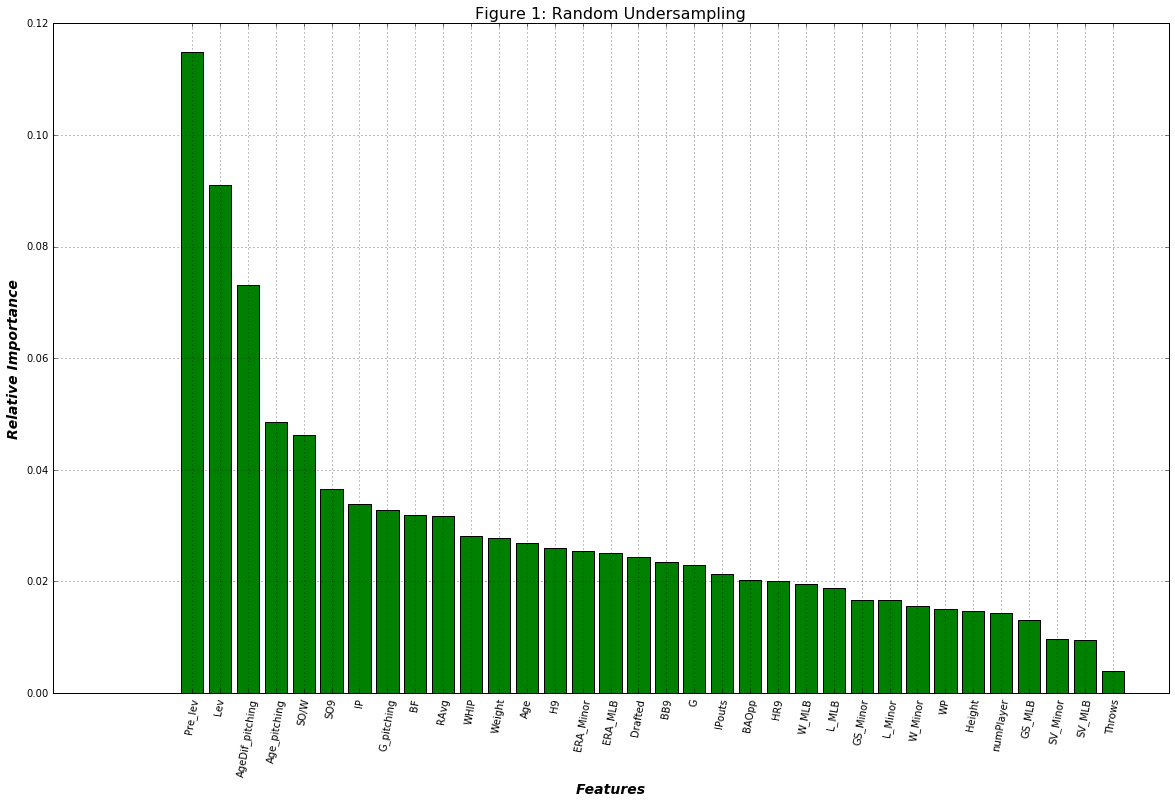

In [827]:
importances = model_RF.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20,12))
_ = plt.bar(range(X_train.shape[1]), importances[indices], align='center', label = X_train.columns[indices], color='green')
_ = plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=80)
plt.grid(True)
plt.xlabel('Features', fontsize=14, fontweight='bold', style='italic')
plt.ylabel('Relative Importance', fontsize=14, fontweight='bold', style='italic')
plt.title('Figure 1: Random Undersampling', fontsize=16)

In [828]:
n_estimators = 500
grd = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.1)
grd.fit(X_resampled, y_resampled)
grd.score(X_test, y_test)
y_pred_gr = grd.predict(X_test)
y_pred_proba_gr = grd.predict_proba(X_test)

In [829]:
print precision_score(y_test, y_pred_gr)
print recall_score(y_test, y_pred_gr)
print roc_auc_score(y_test, y_pred_gr)


0.0390365448505
0.796610169492
0.780340158155


In [830]:
y_pred_proba = model_RF.predict_proba(X_test)[:, 1]
y_pred_proba_gr = grd.predict_proba(X_test)[:, 1]

(<matplotlib.figure.Figure at 0x7ff696bfb490>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff6c78cd690>)

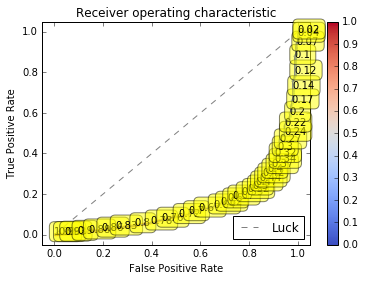

In [831]:
roc_data = roc_curve(y_test, y_pred_proba)
plot_roc.plot_roc(*roc_data, label_every=5)

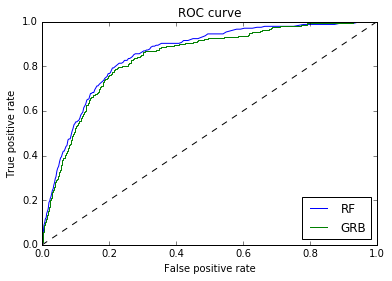

In [832]:
fpr_rf, tpr_rf, _tf = roc_curve(y_test, y_pred_proba)
fpr_gr, tpr_gr, _gr = roc_curve(y_test, y_pred_proba_gr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gr, tpr_gr, label='GRB')
plt.plot
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

In [833]:
X.columns

Index([u'Pre_lev', u'AgeDif_pitching', u'Age_pitching', u'BB9', u'BF',
       u'Drafted', u'ERA_Minor', u'GS_Minor', u'G_pitching', u'H9', u'HR9',
       u'Height', u'IP', u'L_Minor', u'Lev', u'RAvg', u'SO/W', u'SO9',
       u'SV_Minor', u'Throws', u'W_Minor', u'WHIP', u'WP', u'Weight', u'W_MLB',
       u'L_MLB', u'G', u'GS_MLB', u'SV_MLB', u'IPouts', u'BAOpp', u'ERA_MLB',
       u'numPlayer', u'Age'],
      dtype='object')

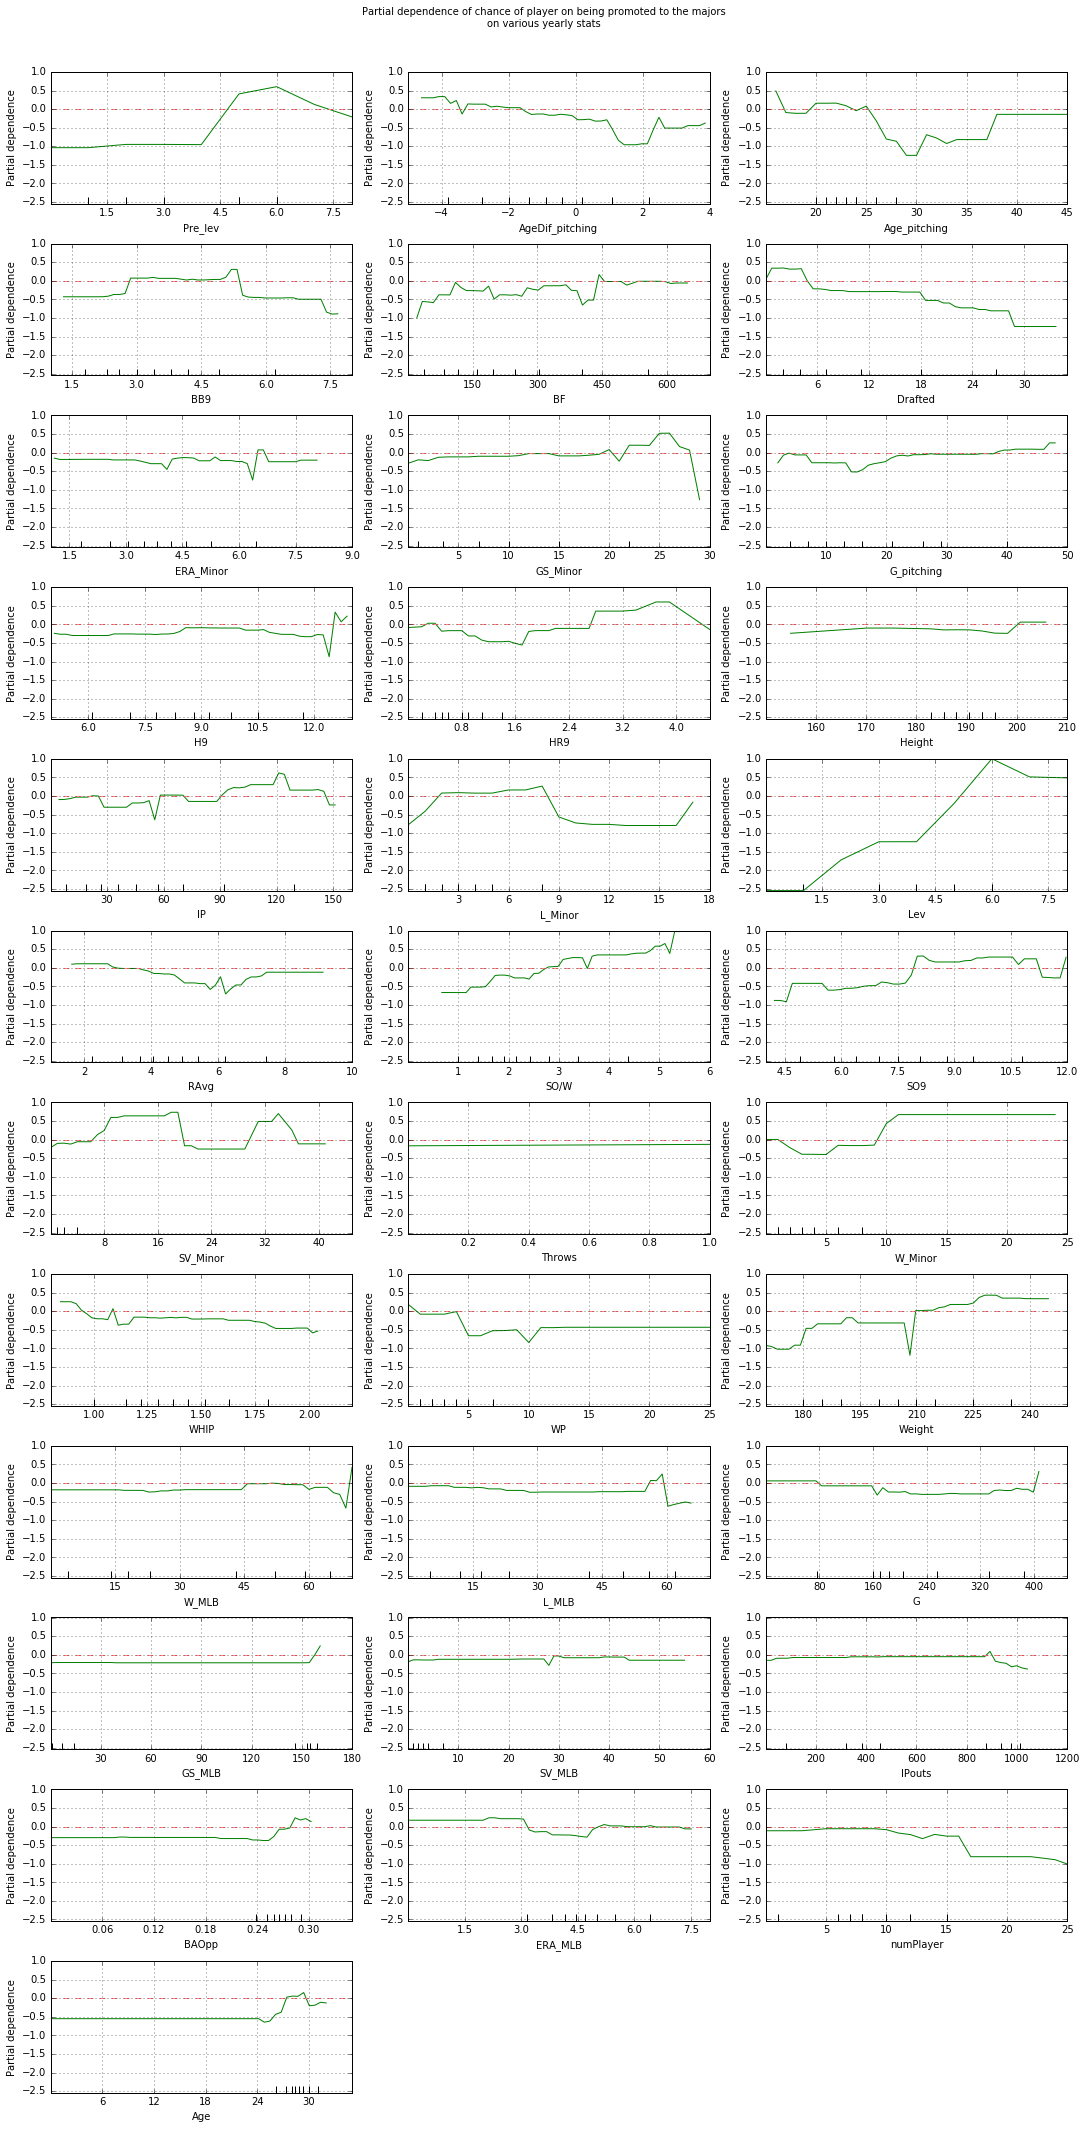

In [834]:
##### features = range(len(X.columns))
names = X.columns
features = range(len(X.columns))
fig, axs = plot_partial_dependence(grd, X_resampled, features,
                                   feature_names=names,
                                   n_jobs=3, grid_resolution=50, figsize=(15, 30),
                                   )
fig.suptitle('Partial dependence of chance of player on being promoted to the majors\n'
             'on various yearly stats')
for axes in axs:
    axes.grid(True)
    axes.axhline(0, linestyle='--', color='#ff8080')
    axes

plt.tight_layout(pad=0.4)
plt.subplots_adjust(top=0.95)  # tight_layout causes overlap with suptitle

## SMOTE

In [835]:
sm = SMOTE(kind='regular')
X_resampled, y_resampled = sm.fit_sample(X_train, y_train)

In [836]:
model_RF = RandomForestClassifier(n_estimators=100, n_jobs=4)
model_RF.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [837]:
model_RF.score(X_test, y_test)

0.98705420108805153

In [838]:
y_pred = model_RF.predict(X_test)

In [839]:
print precision_score(y_test, y_pred)
print recall_score(y_test, y_pred)
print roc_auc_score(y_test, y_pred)

0.216216216216
0.0338983050847
0.516209960046


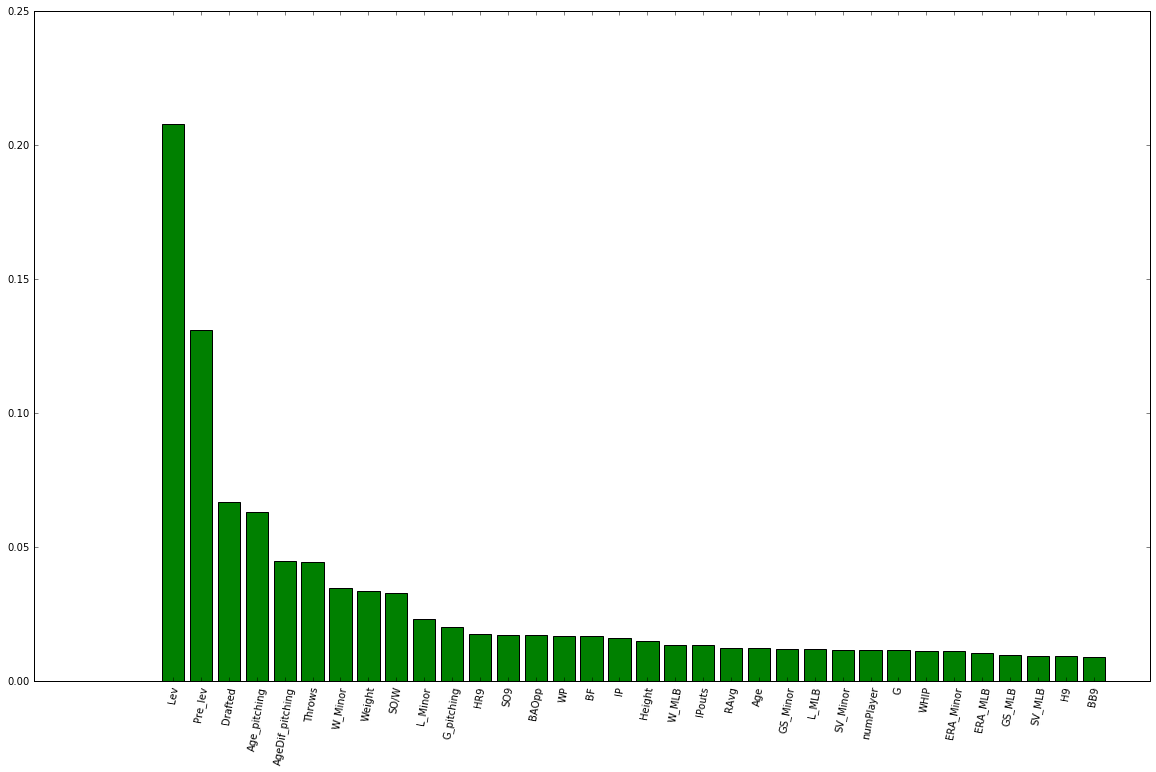

In [840]:
importances = model_RF.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20,12))
_ = plt.bar(range(X_train.shape[1]), importances[indices], align='center', label = X_train.columns[indices], color='green')
_ = plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=80)

In [248]:
y.value_counts()

0    79219
1      954
Name: Rookie?, dtype: int64

In [249]:
X[y==1]['SO/W']

34799      2.88
34855      1.35
34918      3.86
35431      2.17
35898      3.50
37513      2.63
38497      2.00
56384      2.34
56468      2.88
56523      1.35
56574      1.86
56608      2.70
56889      2.25
56897      2.88
56906      2.50
56941      2.78
57079      4.05
57197      2.77
57217      1.95
57325      3.86
57355      4.50
57371      0.94
57386      0.00
57410      3.00
57472      2.63
57499      3.12
57632      2.17
57676      3.00
57747      2.67
57845      2.80
          ...  
119467     2.46
119522     1.49
119583     2.09
119621     3.71
119674     1.63
119694     1.97
119721     1.85
119735     1.94
119785     0.85
119998     2.91
120084     2.33
120189     3.14
120199     2.08
120261     2.64
120313     3.00
120361     1.76
120397    10.80
120565     2.67
120615     4.50
120628     2.50
120687     3.00
120690     2.06
120773     1.95
120834     1.67
120913     1.60
121016     3.30
121031     1.15
121049     3.41
121095     0.27
121135     4.04
Name: SO/W, dtype: float

In [74]:
X[y==1].describe()

,AgeDif_pitching,Pre_lev,Age_pitching,BB9,BF,CS_perc,Drafted,ERA,Fld_perc,GF,...,SHO,SO/W,SO9,SV,Throws_left,Throws_right,W,WHIP,WP,Weight
count,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,...,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000,954.000000
mean,-1.301992,6.795597,23.569182,3.462893,257.519916,25.130060,12.955975,4.398627,0.865935,5.166667,...,0.004441,2.887579,8.118868,1.702306,0.301887,0.698113,3.637317,1.398474,2.866876,210.172956
std,2.382981,1.990307,2.621233,2.259341,204.892504,27.098831,14.732884,7.381679,0.276566,9.478119,...,0.019099,2.221693,2.430922,4.689012,0.459317,0.459317,3.530784,0.844410,2.924028,22.038135
min,-8.800000,0.000000,16.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000
25%,-2.800000,6.000000,22.000000,2.325000,85.000000,0.000000,1.000000,2.812500,0.891250,0.000000,...,0.000000,1.812500,6.500000,0.000000,0.000000,0.000000,1.000000,1.162750,1.000000,195.000000
50%,-1.300000,7.000000,23.000000,3.200000,198.000000,21.000000,7.000000,3.725000,1.000000,0.000000,...,0.000000,2.380000,7.900000,0.000000,0.000000,1.000000,3.000000,1.328500,2.000000,210.000000
75%,0.100000,7.000000,25.000000,4.100000,377.750000,40.000000,21.000000,4.827500,1.000000,6.000000,...,0.000000,3.430000,9.500000,1.000000,1.000000,1.000000,6.000000,1.527250,4.000000,225.000000
max,11.900000,10.000000,39.000000,42.400000,860.000000,100.000000,89.000000,216.000000,1.000000,59.000000,...,0.166667,31.000000,20.200000,41.000000,1.000000,1.000000,24.000000,24.000000,24.000000,300.000000


In [75]:
X[y==0].describe()

,AgeDif_pitching,Pre_lev,Age_pitching,BB9,BF,CS_perc,Drafted,ERA,Fld_perc,GF,...,SHO,SO/W,SO9,SV,Throws_left,Throws_right,W,WHIP,WP,Weight
count,84633.000000,84633.000000,84633.000000,84633.000000,84633.000000,84633.000000,84633.000000,84633.000000,84633.000000,84633.000000,...,84633.000000,84633.000000,84633.000000,84633.000000,84633.000000,84633.000000,84633.000000,84633.000000,84633.000000,84633.000000
mean,-0.056453,4.631810,23.366358,4.365617,193.008921,22.237188,12.419234,5.620903,0.822131,4.585800,...,0.004251,2.268033,7.443643,1.210521,0.264140,0.735860,2.612775,1.549687,3.338154,198.557395
std,2.657737,3.202466,4.040785,4.457604,171.904248,26.520237,15.262134,25.989944,0.309180,7.544633,...,0.025564,1.879520,2.810801,3.531498,0.440877,0.440877,2.921731,0.827436,3.419526,21.759572
min,-12.900000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000
25%,-1.600000,1.000000,21.000000,2.500000,61.000000,0.000000,0.000000,2.940000,0.833000,0.000000,...,0.000000,1.250000,5.800000,0.000000,0.000000,0.000000,0.000000,1.219000,1.000000,185.000000
50%,-0.200000,5.000000,23.000000,3.600000,146.000000,15.000000,5.000000,4.150000,0.958000,1.000000,...,0.000000,1.920000,7.200000,0.000000,0.000000,1.000000,2.000000,1.431000,2.000000,195.000000
75%,1.100000,7.000000,25.000000,5.100000,271.000000,38.000000,22.000000,5.670000,1.000000,6.000000,...,0.000000,2.800000,9.000000,1.000000,1.000000,1.000000,4.000000,1.697000,5.000000,212.000000
max,39.000000,10.000000,65.000000,270.000000,1064.000000,100.000000,94.000000,999.990000,1.000000,64.000000,...,1.000000,78.000000,27.000000,49.000000,1.000000,1.000000,22.000000,30.000000,45.000000,300.000000


In [842]:
logit = LogisticRegression()

In [ ]:
logit.fit(X_train, y_train)

In [166]:
pitchers.to_csv('pitchers_raw.csv')

In [64]:
pitchers[pitchers['Rookie?'] == 1]['Name']

34185     Francisco Liriano
34186     Francisco Liriano
34241             Pat Light
34242             Pat Light
34303        Matt Lindstrom
34304        Matt Lindstrom
34809         Sang-Hoon Lee
35269        Chang-Yong Lim
36848         Josh Lindblom
37807        Jacob Lindgren
37808        Jacob Lindgren
37809        Jacob Lindgren
37810        Jacob Lindgren
55408        Clint Nageotte
55489     Francisco Liriano
55490     Francisco Liriano
55543             Pat Light
55544             Pat Light
55593             J.J. Putz
55594             J.J. Putz
55626         Shelby Miller
55627         Shelby Miller
55902         Kenny Roberts
55910        Brian Mallette
55911        Brian Mallette
55920            Jose Ortiz
55955         Luke Prokopec
56088       Justin Nicolino
56205          Tanner Roark
56223           Troy Mattes
                ...        
118158         Brad Ziegler
118159         Brad Ziegler
118169         Keiichi Yabu
118229    Jordan Zimmermann
118230    Jordan Zim